In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, f1_score

In [2]:
df = pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
205,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
182,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1
26,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1


In [4]:
df.isnull().sum().mean()

0.0

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'],axis=1),
                                                   df['target'],test_size=0.2,random_state=2)

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
lor = LogisticRegression(max_iter=1000, class_weight='balanced')

In [9]:
lor.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [10]:
y_pred = lor.predict(X_test)

In [11]:
print('Recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))
print('Confusion Matrix: ', confusion_matrix(y_test, y_pred))

Recall:  0.9655172413793104
f1 score:  0.888888888888889
Confusion Matrix:  [[26  6]
 [ 1 28]]


([<matplotlib.axis.YTick at 0x78056fe06c90>,
 [Text(0, 0, 'No Disease'), Text(0, 1, 'Disease')])

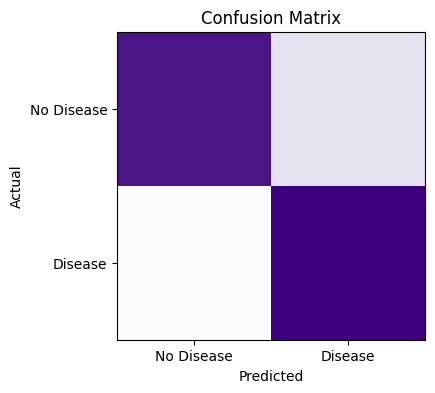

In [12]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm, cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.yticks([0, 1], ['No Disease', 'Disease'])